# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [54]:
import pandas as pd
import numpy as np
from tensorflow.keras import models,layers

In [55]:
dataset = pd.read_csv('ML_Datasets/ionosphere_data.csv')
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [56]:
dataset.sample(frac=1)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
230,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,b
167,1,0,0.44444,0.44444,0.53695,0.90763,-0.22222,1.00000,-0.33333,0.88889,...,0.00000,0.92120,0.45019,0.57454,0.84353,0.22222,1.00000,-0.55556,1.00000,g
341,1,0,0.98002,0.00075,1.00000,0.00000,0.98982,-0.00075,0.94721,0.02394,...,0.08107,0.96709,0.07255,0.95701,0.08088,0.98190,0.08126,0.97247,0.08616,g
202,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.85000,-1.00000,...,1.00000,-1.00000,-0.20000,1.00000,-1.00000,0.00000,1.00000,0.00000,0.00000,b
16,1,0,0.99645,0.06468,1.00000,-0.01236,0.97811,0.02498,0.96112,0.02312,...,0.13412,0.79476,0.13638,0.79110,0.15379,0.77122,0.15930,0.70941,0.12015,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,1,0,0.89835,0.35157,0.67333,0.62233,0.43898,0.94353,-0.03643,0.80510,...,-0.53620,0.07158,-0.51925,0.24321,-0.43478,0.36586,-0.30057,0.42805,0.13297,g
227,1,0,0.88804,0.38138,0.65926,0.69431,0.29148,0.87892,-0.06726,0.90135,...,-0.61055,0.30406,-0.48392,0.43227,-0.29838,0.47029,-0.09461,0.42152,0.12556,g
133,1,0,0.34694,0.20408,0.46939,0.24490,0.40816,0.20408,0.46939,0.44898,...,0.22449,-0.46579,0.14895,-0.59184,0.18367,-0.34694,0.00000,-0.26531,-0.24490,g
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,b


In [57]:
dataset.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [115]:
#Splitting the data
data = dataset.iloc[:,:-1]
targets = dataset.iloc[:,-1]
targets.shape

(351,)

In [116]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_targets,test_targets = train_test_split(data,targets,test_size=.4)
test_data.shape
train_targets.shape

(210,)

In [117]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

train_data.dropna(how="all",axis=1,inplace=True)
test_data.dropna(how="all",axis=1,inplace=True)

<ipython-input-117-0e838ed20661>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(how="all",axis=1,inplace=True)
<ipython-input-117-0e838ed20661>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.dropna(how="all",axis=1,inplace=True)


In [110]:
train_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
12,0.34987,0.761299,-0.510512,0.761227,-0.548889,0.963538,-0.599266,1.006810,-0.778776,0.858214,...,0.795491,-0.834340,0.455438,-1.067525,0.502429,-1.490870,0.598796,-1.363603,0.629262,-1.585464
165,0.34987,0.761299,1.231667,-0.009822,1.970724,-1.130272,1.652271,-2.144257,1.484204,-2.418988,...,0.941158,-0.309322,0.790847,0.435786,0.632280,1.245295,-0.231424,1.820864,-0.864893,1.931641
47,0.34987,0.645053,-0.177062,-3.378077,0.281308,-1.949404,0.394329,0.356763,-1.675366,0.968656,...,0.791740,-0.826065,-0.028358,-1.063028,1.154476,-1.329714,-0.840754,0.386020,-0.754568,0.852908
131,0.34987,-0.010758,-0.077058,-0.601722,-0.372101,-0.045543,-0.234496,-0.695130,-0.139649,-0.084441,...,-0.324992,0.333912,-0.691200,0.131643,-0.416622,0.126959,-0.305231,-0.035405,-0.301586,0.079968
253,0.34987,0.506923,0.952524,-0.075471,1.459684,-0.752016,1.545496,-1.617380,1.492063,-2.050654,...,0.288786,-1.014487,0.373308,-0.431757,0.630929,0.216127,0.404457,0.765481,0.043688,1.204636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.34987,0.504900,0.750488,0.106989,1.173186,-0.428584,1.257147,-0.984397,1.457500,-1.442393,...,-0.921908,-1.417429,-0.736788,-1.313574,0.025945,-1.248189,0.376694,-0.792044,0.590938,-0.380767
319,0.34987,0.438794,-0.067127,0.600022,-0.283020,0.793685,-0.259631,0.853824,-0.224637,0.738241,...,0.789016,0.356438,0.670966,0.193633,0.918535,0.198424,0.901670,0.173156,1.010771,0.155506
185,0.34987,0.420804,0.951766,-0.273599,1.425493,-0.960376,1.524446,-1.906246,1.403562,-2.233400,...,0.629841,-0.459919,0.489946,0.174581,0.472221,0.939663,-0.086160,1.249779,-0.643325,1.467220
239,0.34987,-0.059499,0.154040,0.154695,-0.474926,0.330492,-0.269443,0.462806,-0.382753,0.430451,...,0.564159,-0.061659,0.326934,-0.005376,0.456546,0.111847,0.785198,-0.141292,0.638756,-0.188470


In [118]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_targets = label_encoder.fit_transform(train_targets)
test_targets = label_encoder.fit_transform(test_targets)

In [85]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [86]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [87]:
history = model.fit(train_data,train_targets,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.4916
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6684
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7761
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7962
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4651 - accuracy: 0.8750
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4544 - accuracy: 0.8361
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.8241
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4072 - accuracy: 0.8531
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8666
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8684
Epoch 11/100
7/7 [===========

In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

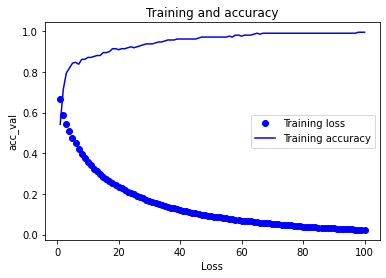

In [89]:
import matplotlib.pyplot as plt
loss_val = history_dict['loss']
acc_val = history_dict['accuracy']
epochs = range(1,len(acc_val)+1)
plt.plot(epochs,loss_val,'bo',label='Training loss')
plt.plot(epochs,acc_val,'b',label='Training accuracy')
plt.title("Training and accuracy")
plt.xlabel('Loss')
plt.ylabel('acc_val')
plt.legend()
plt.show()

In [90]:
loss, accuracy = model.evaluate(test_data,test_targets)
print(f"loss is:{loss}  and accuracy is: {accuracy}")


5/5 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9220
loss is:0.23753727972507477  and accuracy is: 0.9219858050346375


In [91]:
predict = model.predict(test_data)
predict.shape

(141, 1)

In [92]:
predict = predict.reshape(141)

In [93]:
output_df = pd.DataFrame({'Actual':test_targets,'Prediction':np.round(predict)})
output_df

,Actual,Prediction
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,0,0.0
...,...,...
136,1,1.0
137,1,1.0
138,1,1.0
139,1,1.0


In [94]:
filt = (output_df.loc[:,'Actual'] == output_df.loc[:,'Prediction'])
filt.shape

(141,)

In [95]:
print(f"accuracy is :",output_df[filt].shape[0]/output_df.shape[0]*100,"%")

accuracy is : 92.19858156028369 %
